In [1]:
%load_ext jupyter_tikz

In [2]:
import sys
sys.path.append("..")  # Add parent directory to path to import drawtree
from drawtree import create_tikz_from_file

from IPython.display import display
from IPython.core.magic import register_cell_magic
from IPython import get_ipython

In [3]:
!python ../drawtree.py ../games/one_card_poker.ef > ../games/one_card_poker.tex
!python ../drawtree.py ../games/crossing.ef > ../games/crossing.tex
!python ../drawtree.py ../games/Figure1.ef > ../games/Figure1.tex
!python ../drawtree.py ../games/MyTree1.ef > ../games/MyTree1.tex
!python ../drawtree.py ../games/oldex.ef > ../games/oldex.tex
!python ../drawtree.py ../games/x1.ef > ../games/x1.tex

done.
done.
done.
done.
done.
done.


In [4]:
tex_files = [
    "../games/one_card_poker.tex",
    "../games/crossing.tex",
    "../games/Figure1.tex",
    "../games/MyTree1.tex",
    "../games/oldex.tex",
    "../games/x1.tex",
]
tikz_codes = []
for tex_file in tex_files:
    generated_tikz = create_tikz_from_file(
        tex_file, macros_file_path="../macros-drawtree.tex"
    )
    tikz_codes.append(generated_tikz)

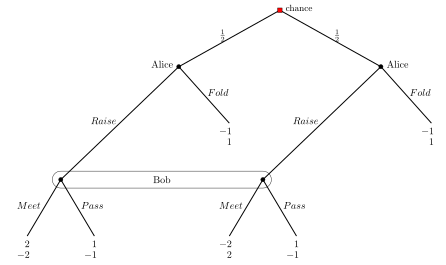

In [5]:
get_ipython().run_cell_magic("tikz", "", tikz_codes[0])

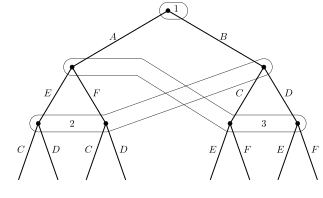

In [6]:
get_ipython().run_cell_magic("tikz", "", tikz_codes[1])

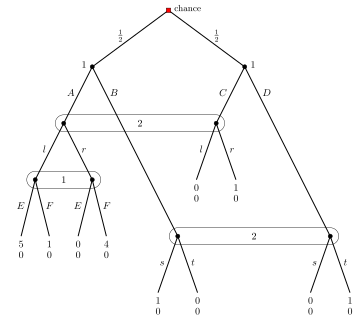

In [7]:
get_ipython().run_cell_magic("tikz", "", tikz_codes[2])

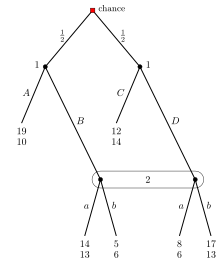

In [8]:
get_ipython().run_cell_magic("tikz", "", tikz_codes[3])

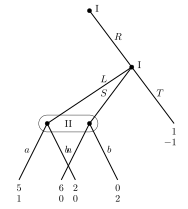

In [9]:
get_ipython().run_cell_magic("tikz", "", tikz_codes[4])

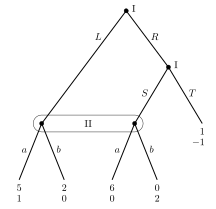

In [10]:
get_ipython().run_cell_magic("tikz", "", tikz_codes[5])